# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ubatuba
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | ust-tsilma
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | sahavato
City not found. Skipping...
Processing Record 7 of Set 1 | sishilichengzi
City not found. Skipping...
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | sarikei
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | bolgatanga
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | ahvaz
Processing Record 20 of Set 1 | tangalle
Processing Record 21

In [4]:
pd.DataFrame(city_data)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ubatuba,-23.4339,-45.0711,80.53,78,18,5.82,BR,1704653883
1,bredasdorp,-34.5322,20.0403,64.02,66,98,3.49,ZA,1704653883
2,blackmans bay,-43.0167,147.3167,59.13,95,100,1.99,AU,1704653883
3,ust-tsilma,65.4410,52.1498,-0.26,99,90,3.94,RU,1704653883
4,tura,25.5198,90.2201,57.69,54,0,2.68,IN,1704653883
...,...,...,...,...,...,...,...,...,...
582,chibougamau,49.9168,-74.3659,10.02,79,100,6.91,CA,1704653992
583,thinadhoo,0.5333,72.9333,82.94,77,100,14.27,MV,1704653992
584,kyren,51.6828,102.1408,13.95,97,98,1.01,RU,1704653993
585,korenevo,55.6719,38.0078,-7.19,84,0,6.71,RU,1704653993


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ubatuba,-23.4339,-45.0711,80.53,78,18,5.82,BR,1704653883
1,bredasdorp,-34.5322,20.0403,64.02,66,98,3.49,ZA,1704653883
2,blackmans bay,-43.0167,147.3167,59.13,95,100,1.99,AU,1704653883
3,ust-tsilma,65.4410,52.1498,-0.26,99,90,3.94,RU,1704653883
4,tura,25.5198,90.2201,57.69,54,0,2.68,IN,1704653883


In [6]:
# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ubatuba,-23.4339,-45.0711,80.53,78,18,5.82,BR,1704653883
1,bredasdorp,-34.5322,20.0403,64.02,66,98,3.49,ZA,1704653883
2,blackmans bay,-43.0167,147.3167,59.13,95,100,1.99,AU,1704653883
3,ust-tsilma,65.4410,52.1498,-0.26,99,90,3.94,RU,1704653883
4,tura,25.5198,90.2201,57.69,54,0,2.68,IN,1704653883


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ubatuba,-23.4339,-45.0711,80.53,78,18,5.82,BR,1704653883
1,bredasdorp,-34.5322,20.0403,64.02,66,98,3.49,ZA,1704653883
2,blackmans bay,-43.0167,147.3167,59.13,95,100,1.99,AU,1704653883
3,ust-tsilma,65.4410,52.1498,-0.26,99,90,3.94,RU,1704653883
4,tura,25.5198,90.2201,57.69,54,0,2.68,IN,1704653883


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

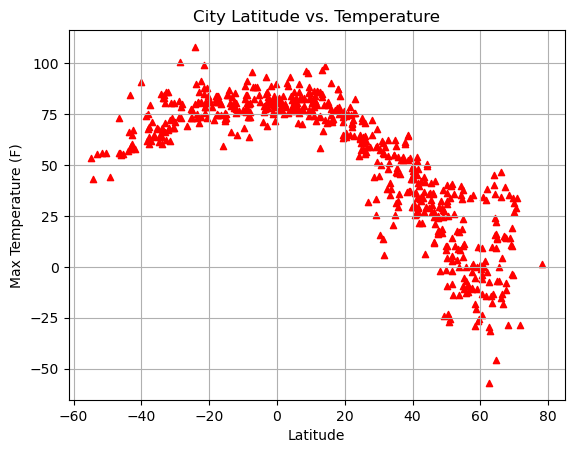

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp', marker='^', color='red')

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

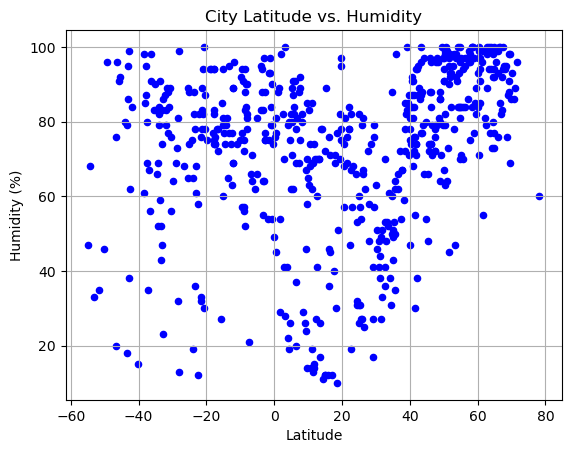

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', marker = 'o', color = 'blue')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

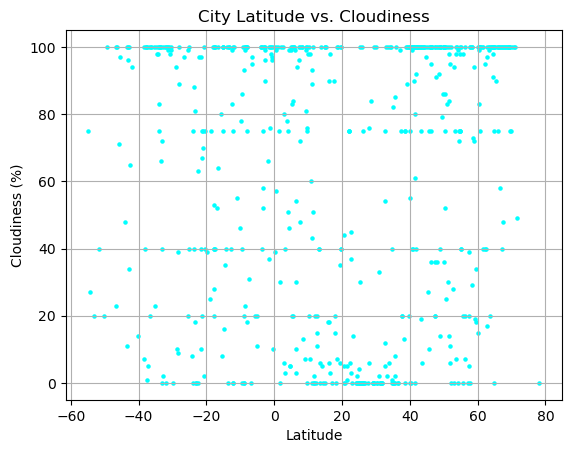

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', marker = '.', color= 'cyan')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

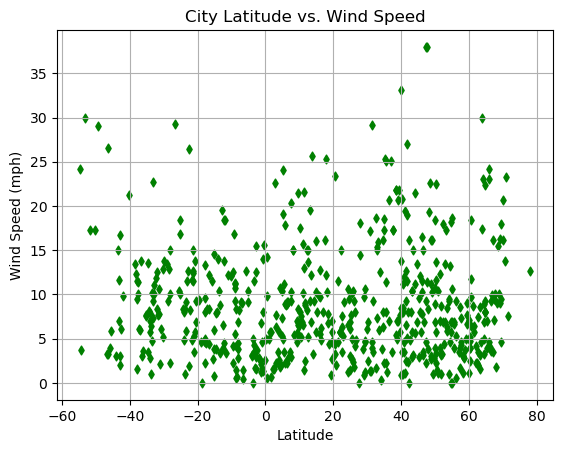

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', marker = 'd', color = 'green')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x, y, title='', xlabel='', ylabel=''):

    data = pd.DataFrame({'x': x, 'y': y})

    # Create a linear regression plot
    sns.lmplot(x='x', y='y', data=data)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ust-tsilma,65.4410,52.1498,-0.26,99,90,3.94,RU,1704653883
4,tura,25.5198,90.2201,57.69,54,0,2.68,IN,1704653883
5,georgetown,5.4112,100.3354,78.75,91,20,3.44,MY,1704653884
6,ribeira grande,38.5167,-28.7000,64.80,72,75,21.85,PT,1704653884
7,sarikei,2.1167,111.5167,75.09,98,100,1.61,MY,1704653884


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ubatuba,-23.4339,-45.0711,80.53,78,18,5.82,BR,1704653883
1,bredasdorp,-34.5322,20.0403,64.02,66,98,3.49,ZA,1704653883
2,blackmans bay,-43.0167,147.3167,59.13,95,100,1.99,AU,1704653883
9,port alfred,-33.5906,26.8910,67.17,91,100,1.01,ZA,1704653657
10,waitangi,-43.9535,-176.5597,56.82,80,48,3.00,NZ,1704653884


###  Temperature vs. Latitude Linear Regression Plot

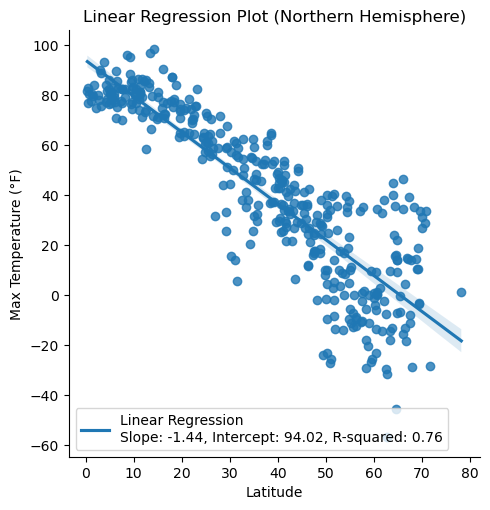

In [42]:
# Linear regression on Northern Hemisphere
linear_regression_plot(
    x=northern_hemi_df['Lat'],
    y=northern_hemi_df['Max Temp'],
    title='Linear Regression Plot (Northern Hemisphere)',
    xlabel='Latitude',
    ylabel='Max Temperature (°F)',
)
plt.show()

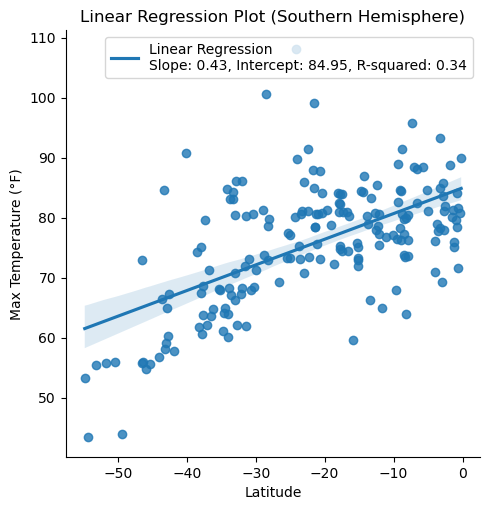

In [43]:
# Linear regression on Southern Hemisphere
linear_regression_plot(
    x=southern_hemi_df['Lat'],
    y=southern_hemi_df['Max Temp'],
    title='Linear Regression Plot (Southern Hemisphere)',
    xlabel='Latitude',
    ylabel='Max Temperature (°F)'
)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

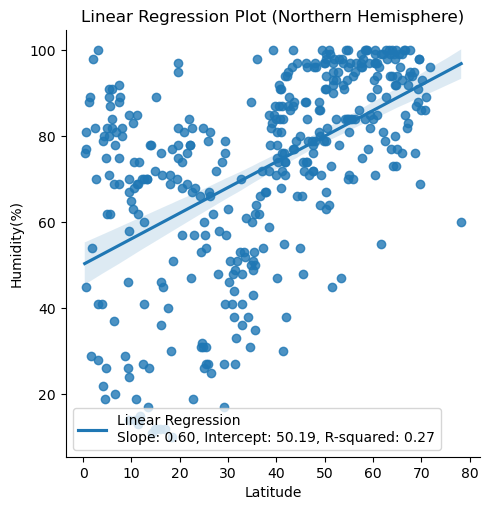

In [44]:
# Northern Hemisphere
linear_regression_plot(
    x=northern_hemi_df['Lat'],
    y=northern_hemi_df['Humidity'],
    title='Linear Regression Plot (Northern Hemisphere)',
    xlabel='Latitude',
    ylabel='Humidity(%)'
)

plt.show()

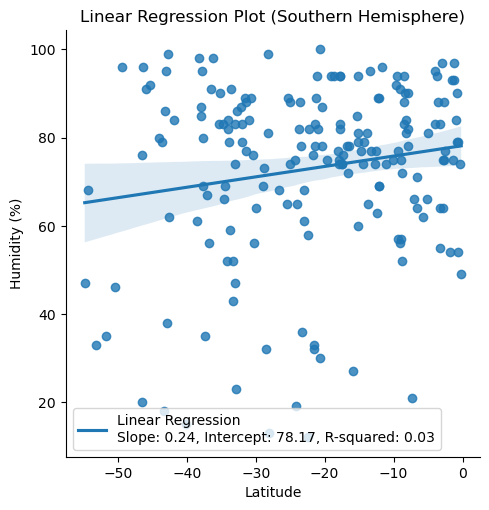

In [45]:
# Southern Hemisphere
linear_regression_plot(
    x=southern_hemi_df['Lat'],
    y=southern_hemi_df['Humidity'],
    title='Linear Regression Plot (Southern Hemisphere)',
    xlabel='Latitude',
    ylabel='Humidity (%)'
)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

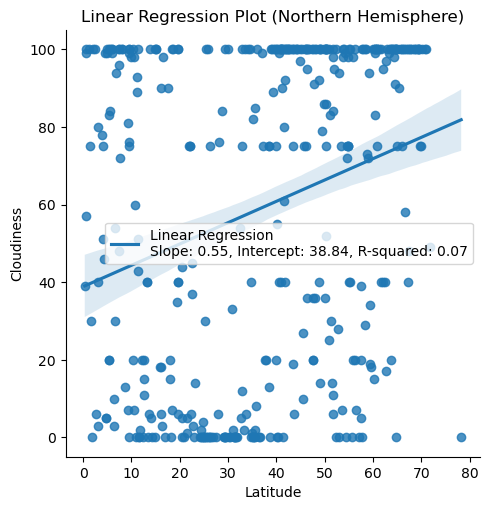

In [46]:
# Northern Hemisphere
linear_regression_plot(
    x=northern_hemi_df['Lat'],
    y=northern_hemi_df['Cloudiness'],
    title='Linear Regression Plot (Northern Hemisphere)',
    xlabel='Latitude',
    ylabel='Cloudiness'
)

plt.show()

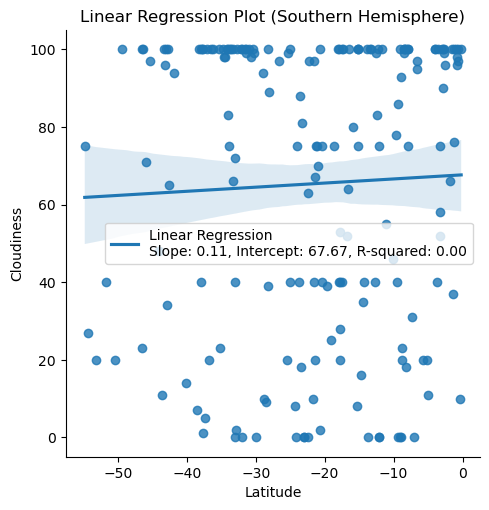

In [47]:
# Southern Hemisphere
linear_regression_plot(
    x=southern_hemi_df['Lat'],
    y=southern_hemi_df['Cloudiness'],
    title='Linear Regression Plot (Southern Hemisphere)',
    xlabel='Latitude',
    ylabel='Cloudiness'
)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

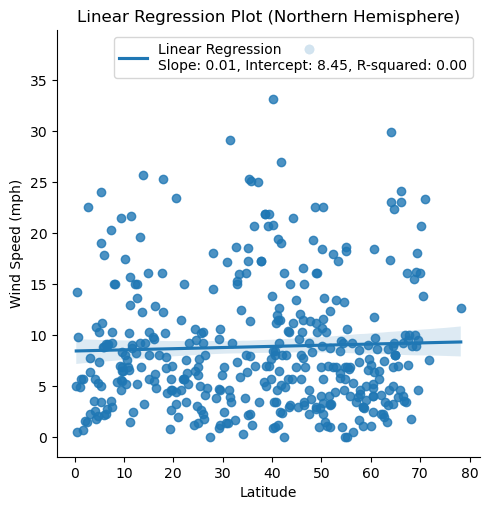

In [48]:
# Northern Hemisphere
linear_regression_plot(
    x=northern_hemi_df['Lat'],
    y=northern_hemi_df['Wind Speed'],
    title='Linear Regression Plot (Northern Hemisphere)',
    xlabel='Latitude',
    ylabel='Wind Speed (mph)'
)

plt.show()

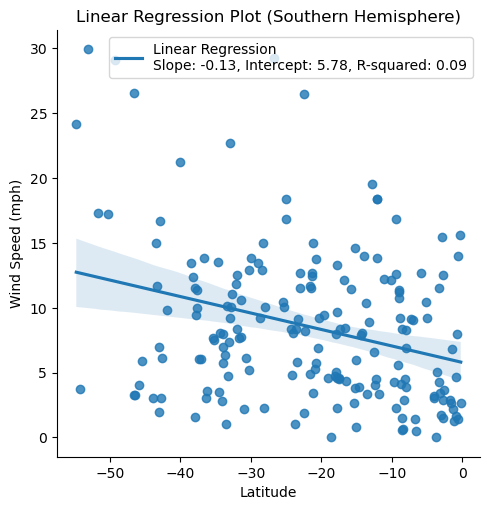

In [49]:
# Southern Hemisphere
linear_regression_plot(
    x=southern_hemi_df['Lat'],
    y=southern_hemi_df['Wind Speed'],
    title='Linear Regression Plot (Southern Hemisphere)',
    xlabel='Latitude',
    ylabel='Wind Speed (mph)'
)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE